<a href="https://colab.research.google.com/github/syaefulalam/sentimen-analysis/blob/master/titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
df = pd.read_csv('train.csv')

Survived => survive or not (0=No, 1=Yes)
pclass => passanger class (1=1st, 2=2nd, 3=3rd)
sex => gender
Age => age in years
sibsp => number of siblings/spous aboard the Titanic
parch => number of parents/children aboard the Titanic
ticket => ticket number
fare => passanger fare
cabin => cabin number
embarked => port of embarktion (C=Cherbourg, Q=Queenstown, S=Southampton)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
for col in df.columns:
    print(col, df[col].isnull().values.any())

PassengerId False
Survived False
Pclass False
Name False
Sex False
Age True
SibSp False
Parch False
Ticket False
Fare False
Cabin True
Embarked True


In [0]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('U')

In [0]:
pclass_encoding = pd.get_dummies(df['Pclass'], prefix='Pclass')
sex_encoding = pd.get_dummies(df['Sex'], prefix='Sex')
embarked_encoding = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, pclass_encoding, sex_encoding, embarked_encoding], axis=1)

In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
def train_test(df, feature_cols, pred_col):
    X = df[feature_cols].values
    y = df[pred_col].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
    clf = svm.SVC().fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    
    correct_prediction = 0
    for t, p in zip(y_test, y_preds):
        if t == p:
            correct_prediction += 1
    
    return correct_prediction/len(y_test)

In [0]:
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 
                'Embarked_C', 'Embarked_Q', 'Embarked_S']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6983240223463687

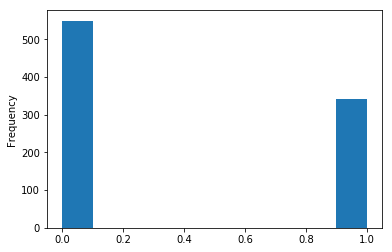

In [0]:
df['Survived'].plot.hist()

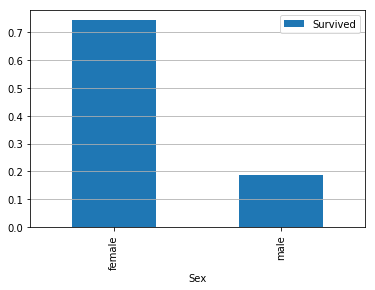

In [0]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.grid(axis='y')
plt.show()

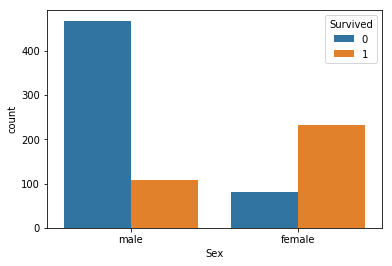

In [0]:
sns.countplot('Sex',hue='Survived',data=df)
plt.show()

In [0]:
feature_cols = ['Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7821229050279329

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


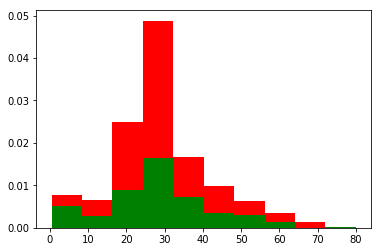

In [0]:
survived_df = df[df['Survived'] == 1]
non_survived_df = df[df['Survived'] == 0]
plt.hist([survived_df['Age'], non_survived_df['Age']], bins = 10, stacked=True,
         normed=True, color = ['g','r'], label=['survived', 'non_survived'])
plt.show()

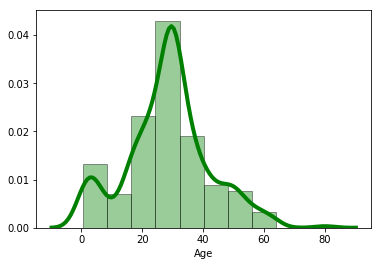

In [0]:
sns.distplot(survived_df['Age'], hist=True, kde=True, 
             bins=10, color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

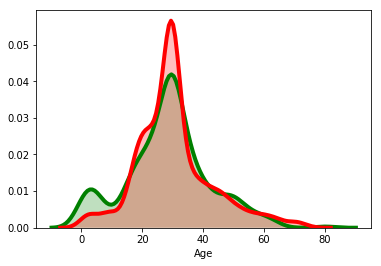

In [0]:
sns.distplot(survived_df['Age'], hist=False, kde=True, 
             bins=10, color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True})
sns.distplot(non_survived_df['Age'], hist=False, kde=True, 
             bins=10, color = 'r', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True})

In [0]:
df.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

In [0]:
pd.crosstab(df.Pclass, df.Survived).style.background_gradient()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [0]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').style.background_gradient()

Survived,0,1
Pclass,,
1,0.37037,0.62963
2,0.527174,0.472826
3,0.757637,0.242363


In [0]:
pd.crosstab([df['Sex'],df['Pclass']], df['Survived'], normalize='index').style.background_gradient()

In [0]:
pd.crosstab([df['Sex'],df['Pclass']], df['Survived']).style.background_gradient()

In [0]:
feature_cols = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7821229050279329

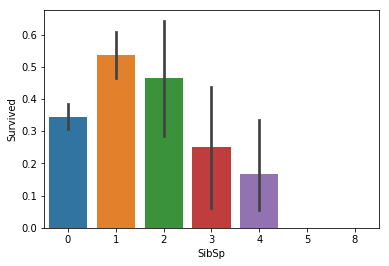

In [0]:
sns.barplot('SibSp','Survived',data=df)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


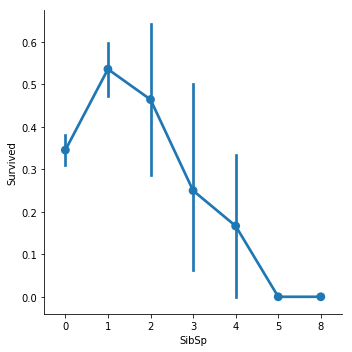

In [0]:
sns.factorplot('SibSp','Survived',data=df)

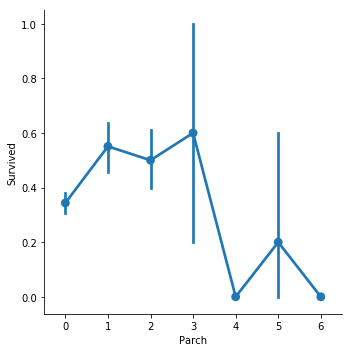

In [0]:
sns.factorplot('Parch','Survived',data=df)

In [0]:
df['less_parch'] = np.where(df['Parch'] <= 3, 1, 0)
df['less_sibsp'] = np.where(df['Parch'] <= 2, 1, 0)

In [0]:
feature_cols = ['SibSp', 'Parch', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7932960893854749

In [0]:
feature_cols = ['SibSp', 'Parch', 'less_parch', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

/Users/gregorius.edwadr/miniconda3/envs/timeseries/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8044692737430168